# Project Code

The project Colab notebook should be submitted at the end of the project. To prepare the notebook, consider the following instruction:

1. Code in the notebook cells and generate proper outputs with explanatory descriptions (e.g. `print('the RMSE for testing the model on the train dataset:', train_RMSE)`).
2. Use comments (using #) for each cell to explain the code.
3. All the models covered in this course should be trained and tested on both train and test datasets.


> *   For regression problems, Linear Reg, Polynomial Reg (with different degrees), ElasticNet (in case of overfitting problem), SVM (Linear and Poly), Decision Trees, and Random Forest.

> *   For Classification problems, SGDClassifier, SVM, Decision Trees, and Random Forest.


> *   For regression problems, calculate RMSEs for all the trained models (evaluate models on both train and test datasets). <br>
IMPORTANT Note: there should be no overfitting issue in any of the models.

> *   For Classification problems, calculate confusion matrix, precision, recall, and f1 score for all the trained models (evaluate models on both train and test datasets. <br>
IMPORTANT Note: there should be no overfitting issue in any of the models.















In [ ]:
# import the dataset using pandas to read NY-House-Dataset.csv

import pandas as pd
housing = pd.read_csv('NY-House-Dataset.csv')

### Data Visualization:

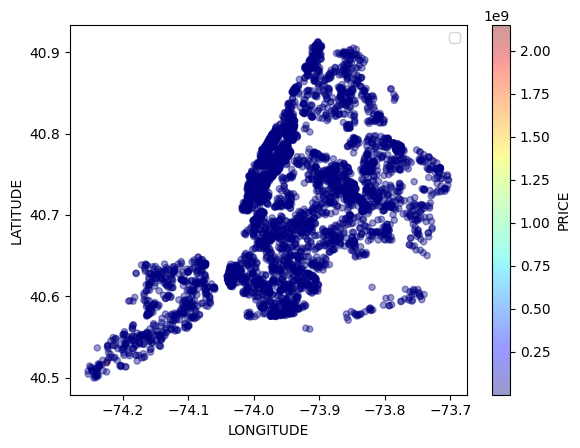

In [ ]:
#Visually plot the longtitude and latitude to see which region of NY that the dataset mostly lies on
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True)


plt.legend()

#The plot is shaping specfic regions of NY state

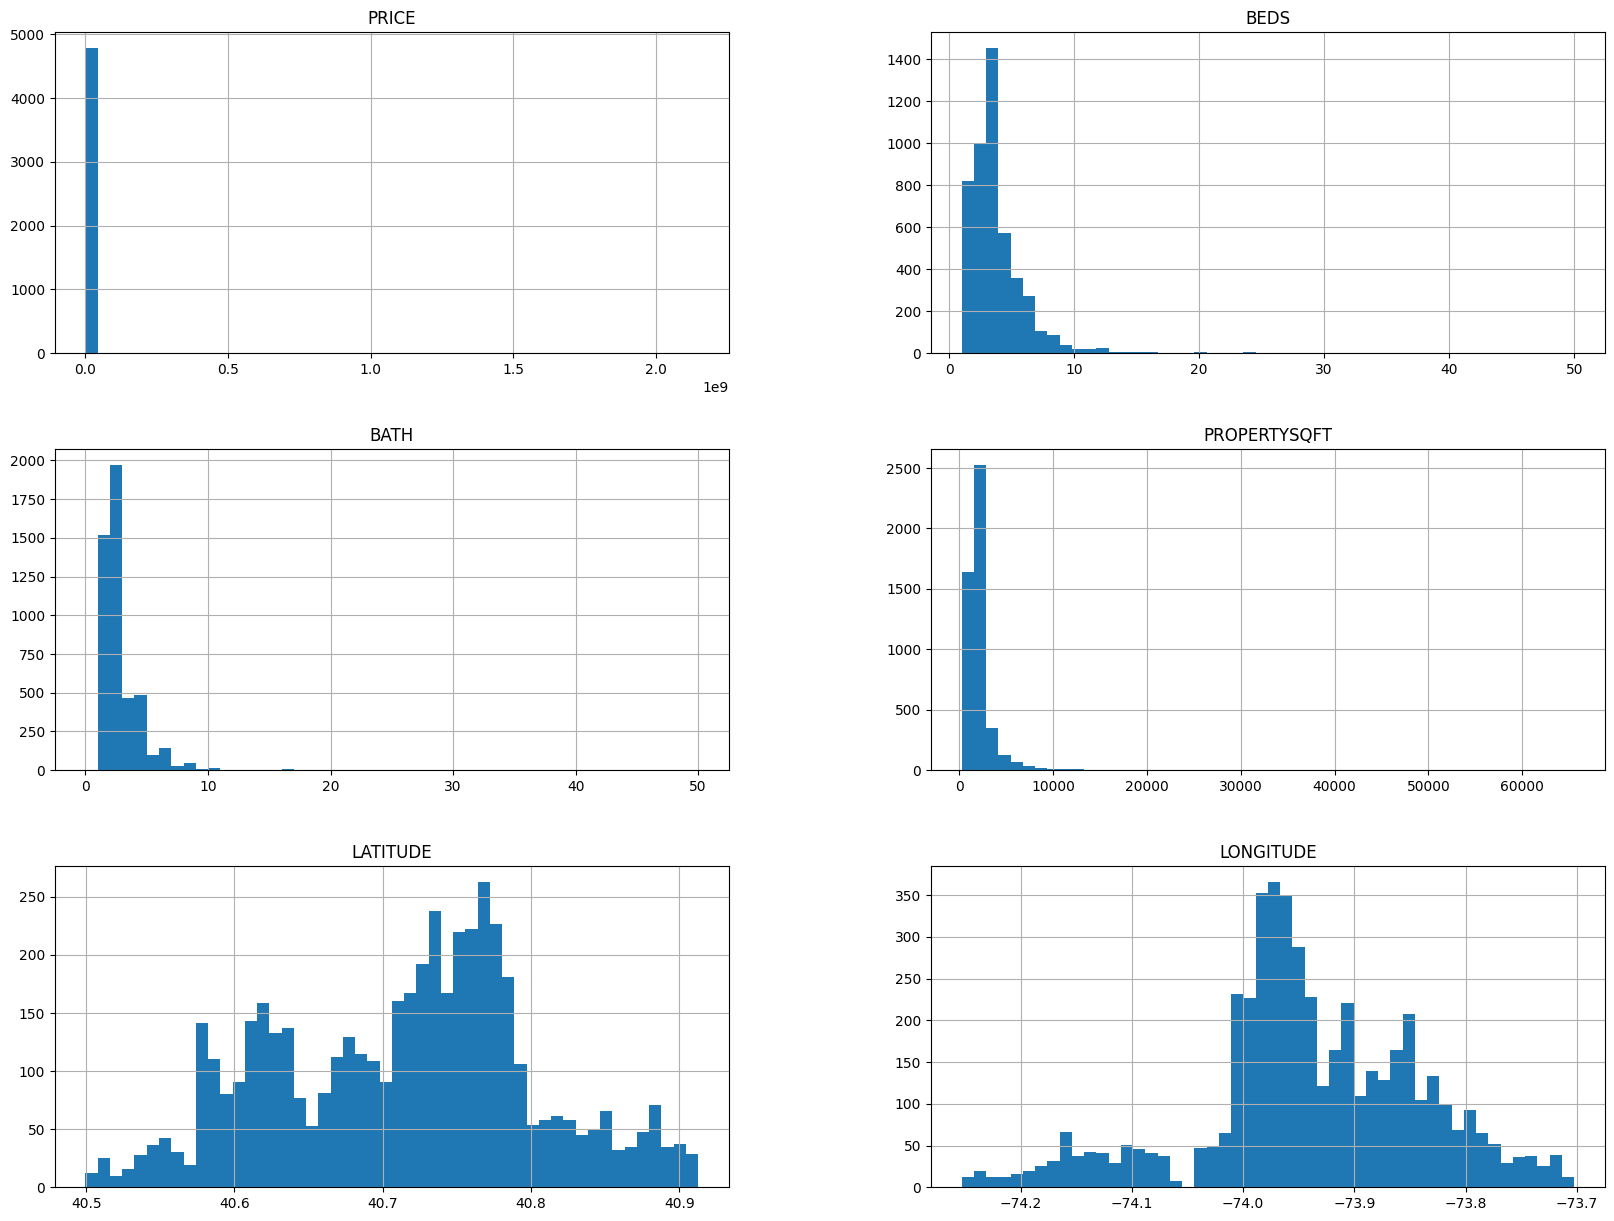

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#Based on histograms, there are outliers to address in data

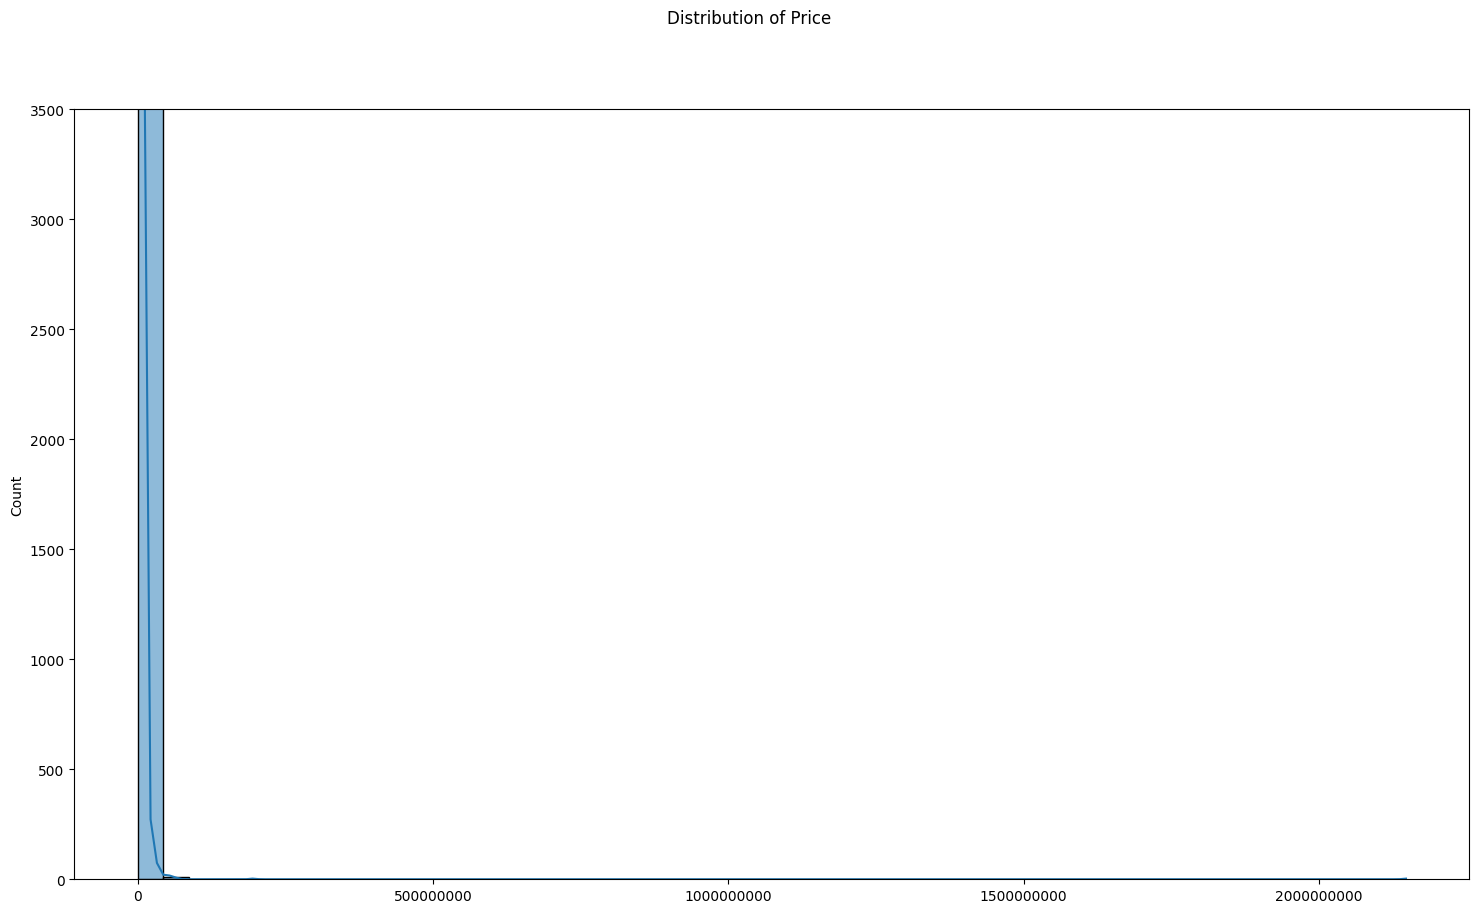

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/code/jalenlyu/ny-housing-eda-modeling

fig, ax = plt.subplots(figsize=(18, 10))
fig = sns.histplot(data=housing, x='PRICE', bins=50, kde=True)
plt.ylim(0,3500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of Price')
plt.show()

In [ ]:
housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
#Remove outliers in PRICE column:
#Code to remove outliers were based on: https://www.kaggle.com/code/jalenlyu/ny-housing-eda-modeling#2.-Exploratory-Data-Analysis

from scipy import stats
import numpy as np

# Calculate z-scores for the 'PRICE' column
z_scores = stats.zscore(housing['PRICE'])

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify outliers based on the threshold
outliers_price = housing['PRICE'][np.abs(z_scores) > threshold]

# Display the outliers
print("Outliers in the PRICE column:")
print(outliers_price)

Outliers in the PRICE column:
1        195000000
4         55000000
69        65000000
99        55000000
141       56000000
181       39995000
304     2147483647
626       50000000
1075      60000000
1258      34000000
1453      48000000
1465      40000000
2107      36000000
3388      45000000
3571      44500000
Name: PRICE, dtype: int64


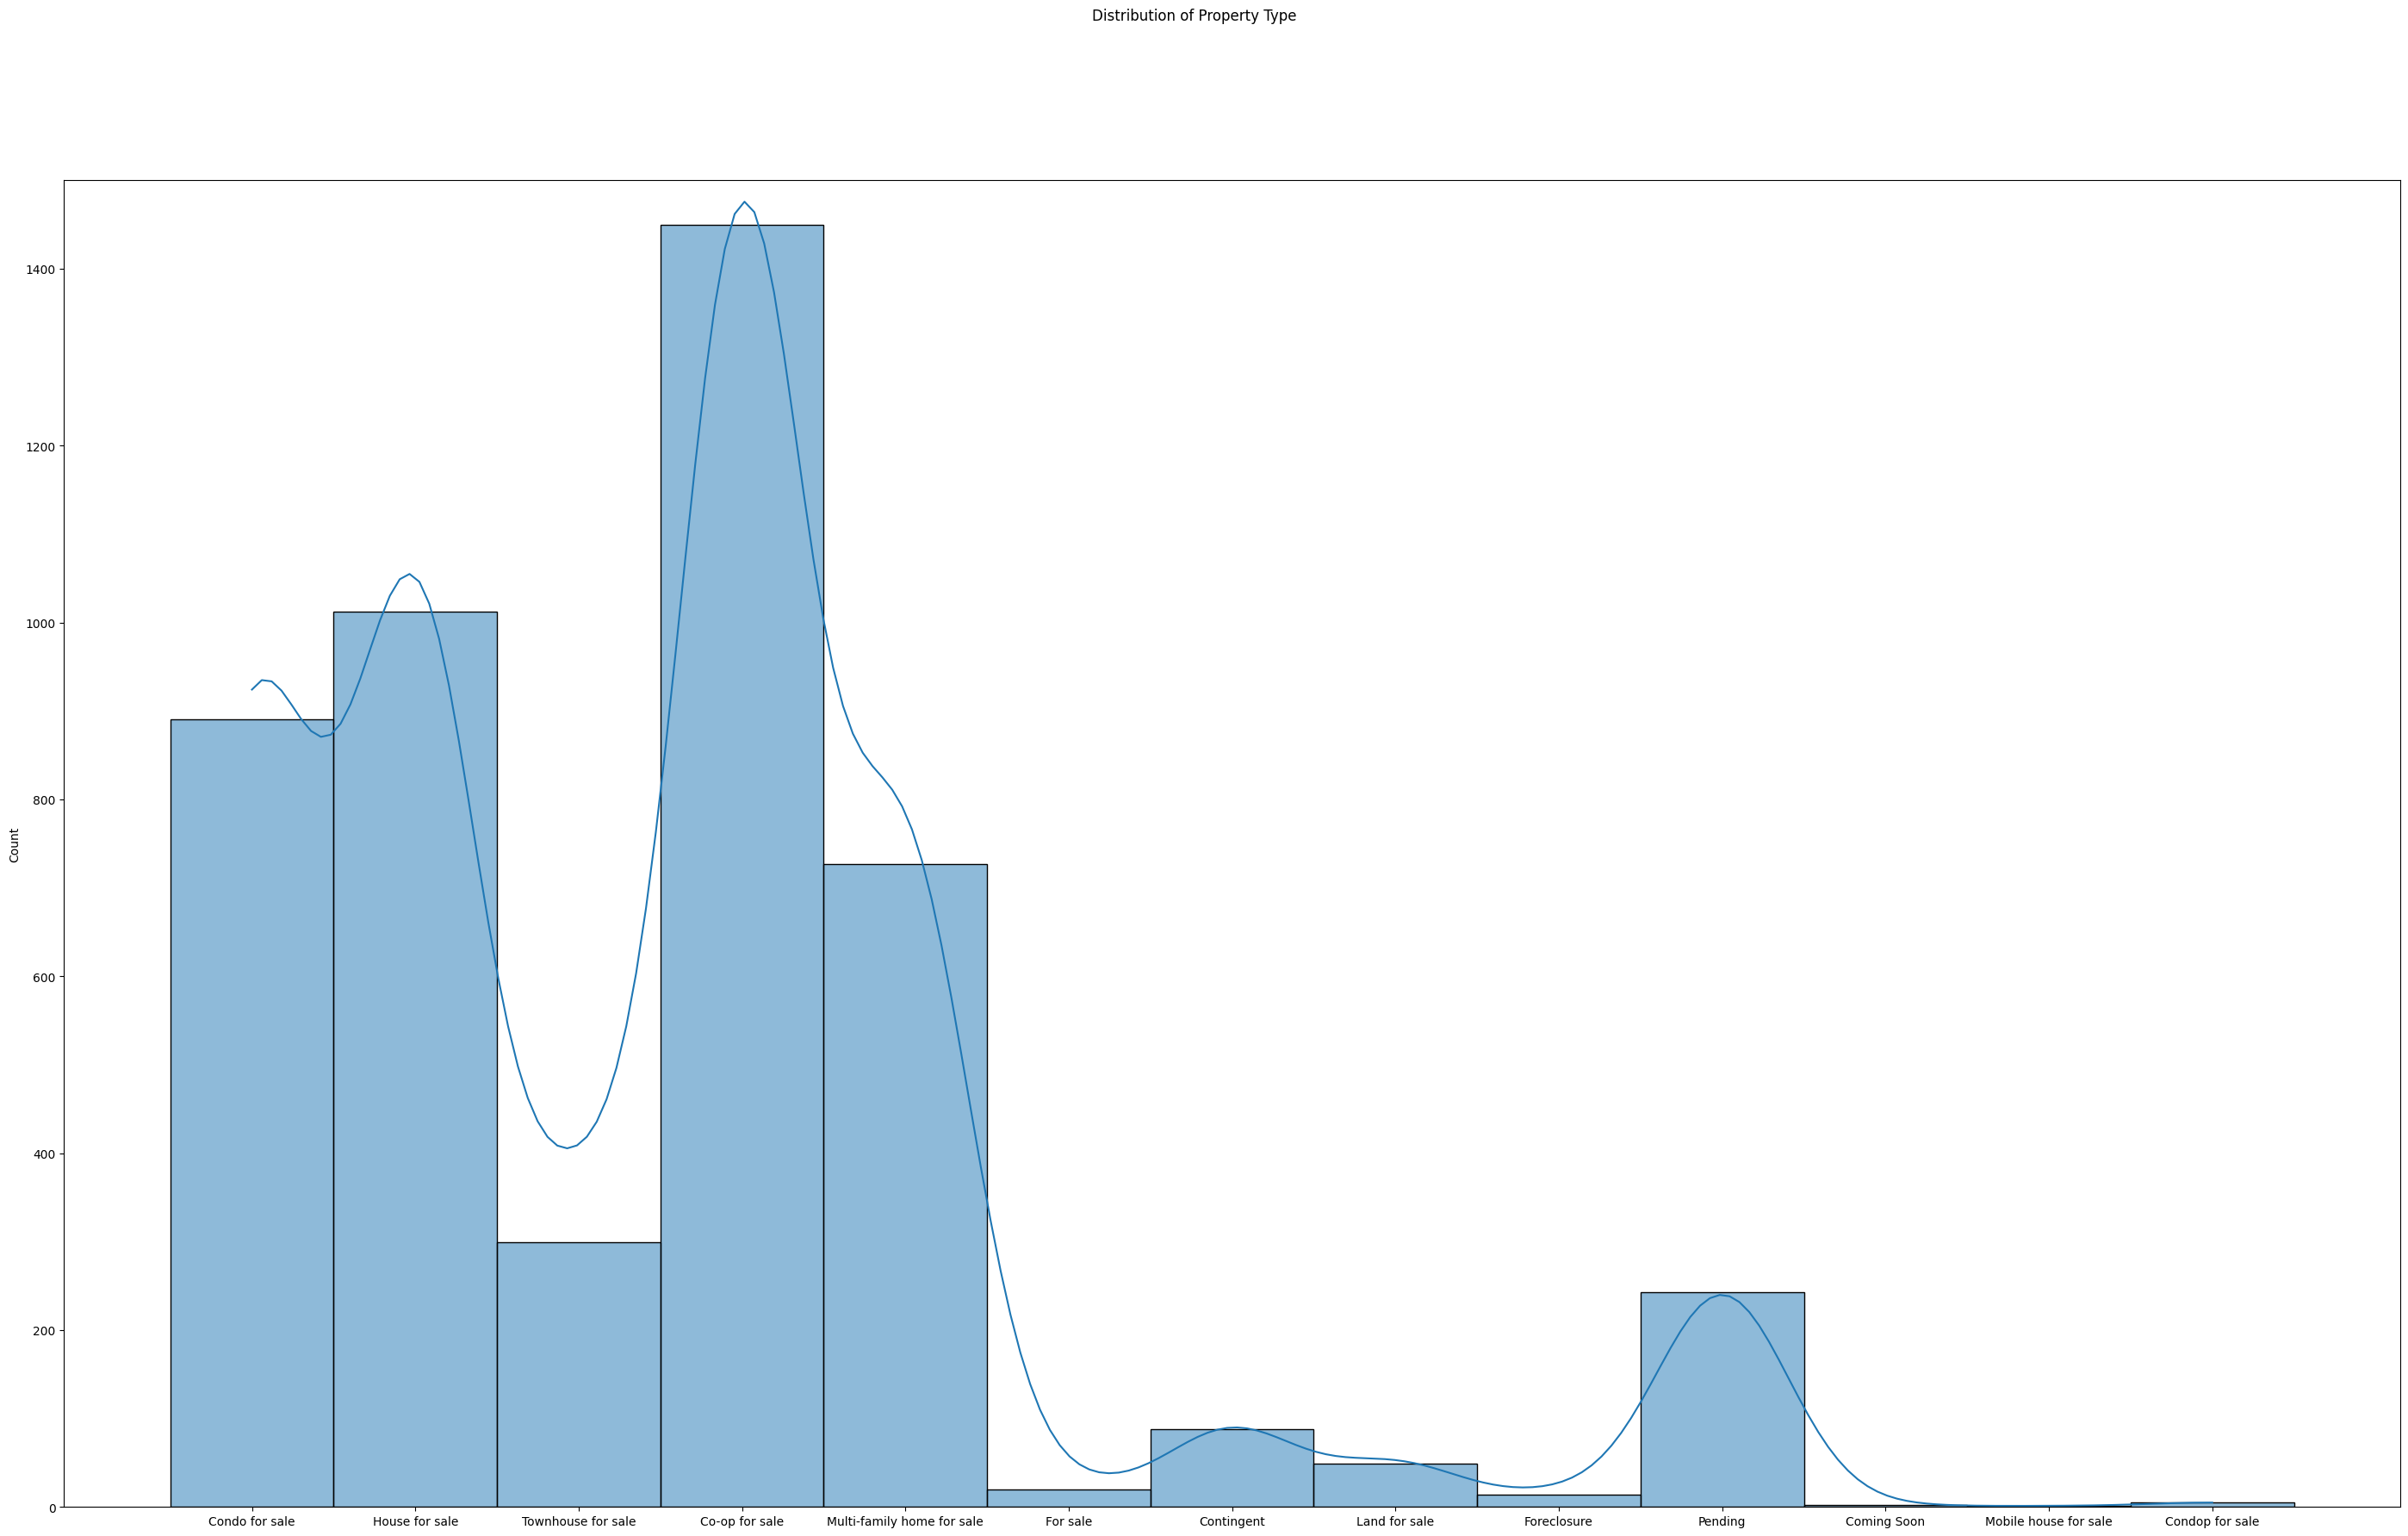

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
fig = sns.histplot(data=housing, x='TYPE', bins=75, kde=True)
plt.ylim(0,1500)
fig.set(xlabel='')
plt.suptitle('Distribution of Property Type')
plt.show()

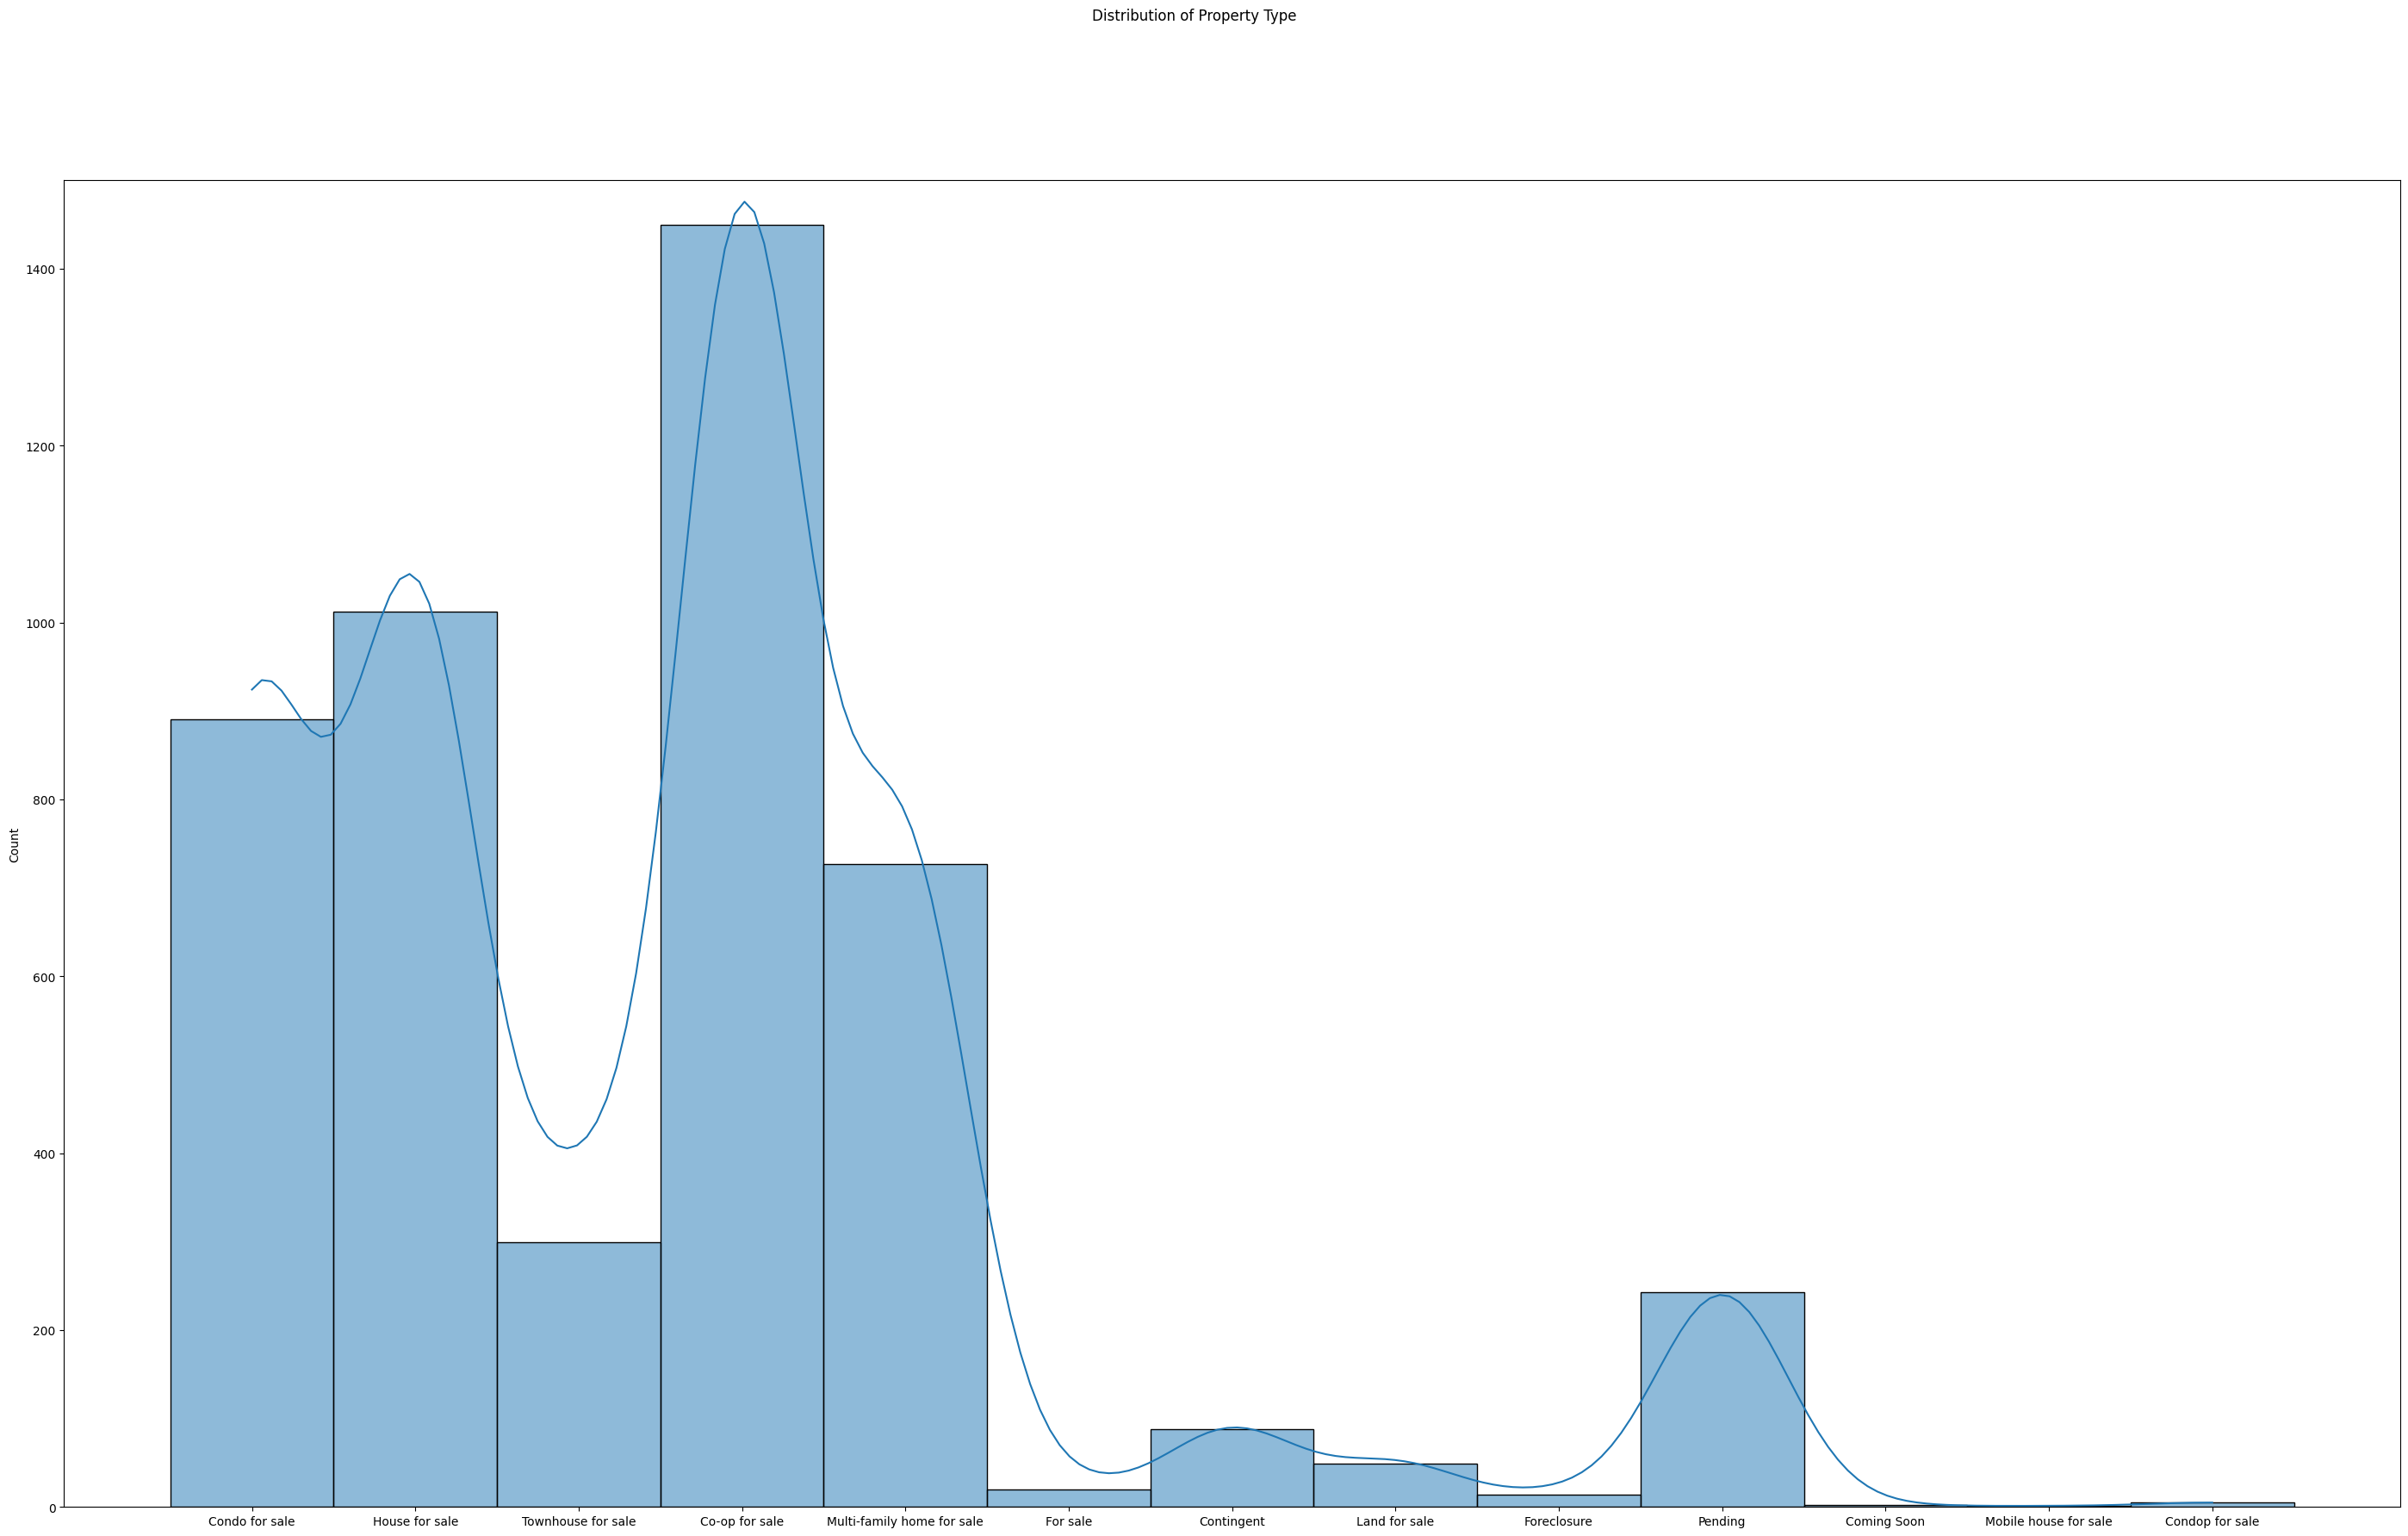

In [ ]:
fig, ax = plt.subplots(figsize=(35, 20))
fig = sns.histplot(data=housing, x='TYPE', bins=75, kde=True)
plt.ylim(0,1500)
fig.set(xlabel='')
plt.suptitle('Distribution of Property Type')
plt.show()

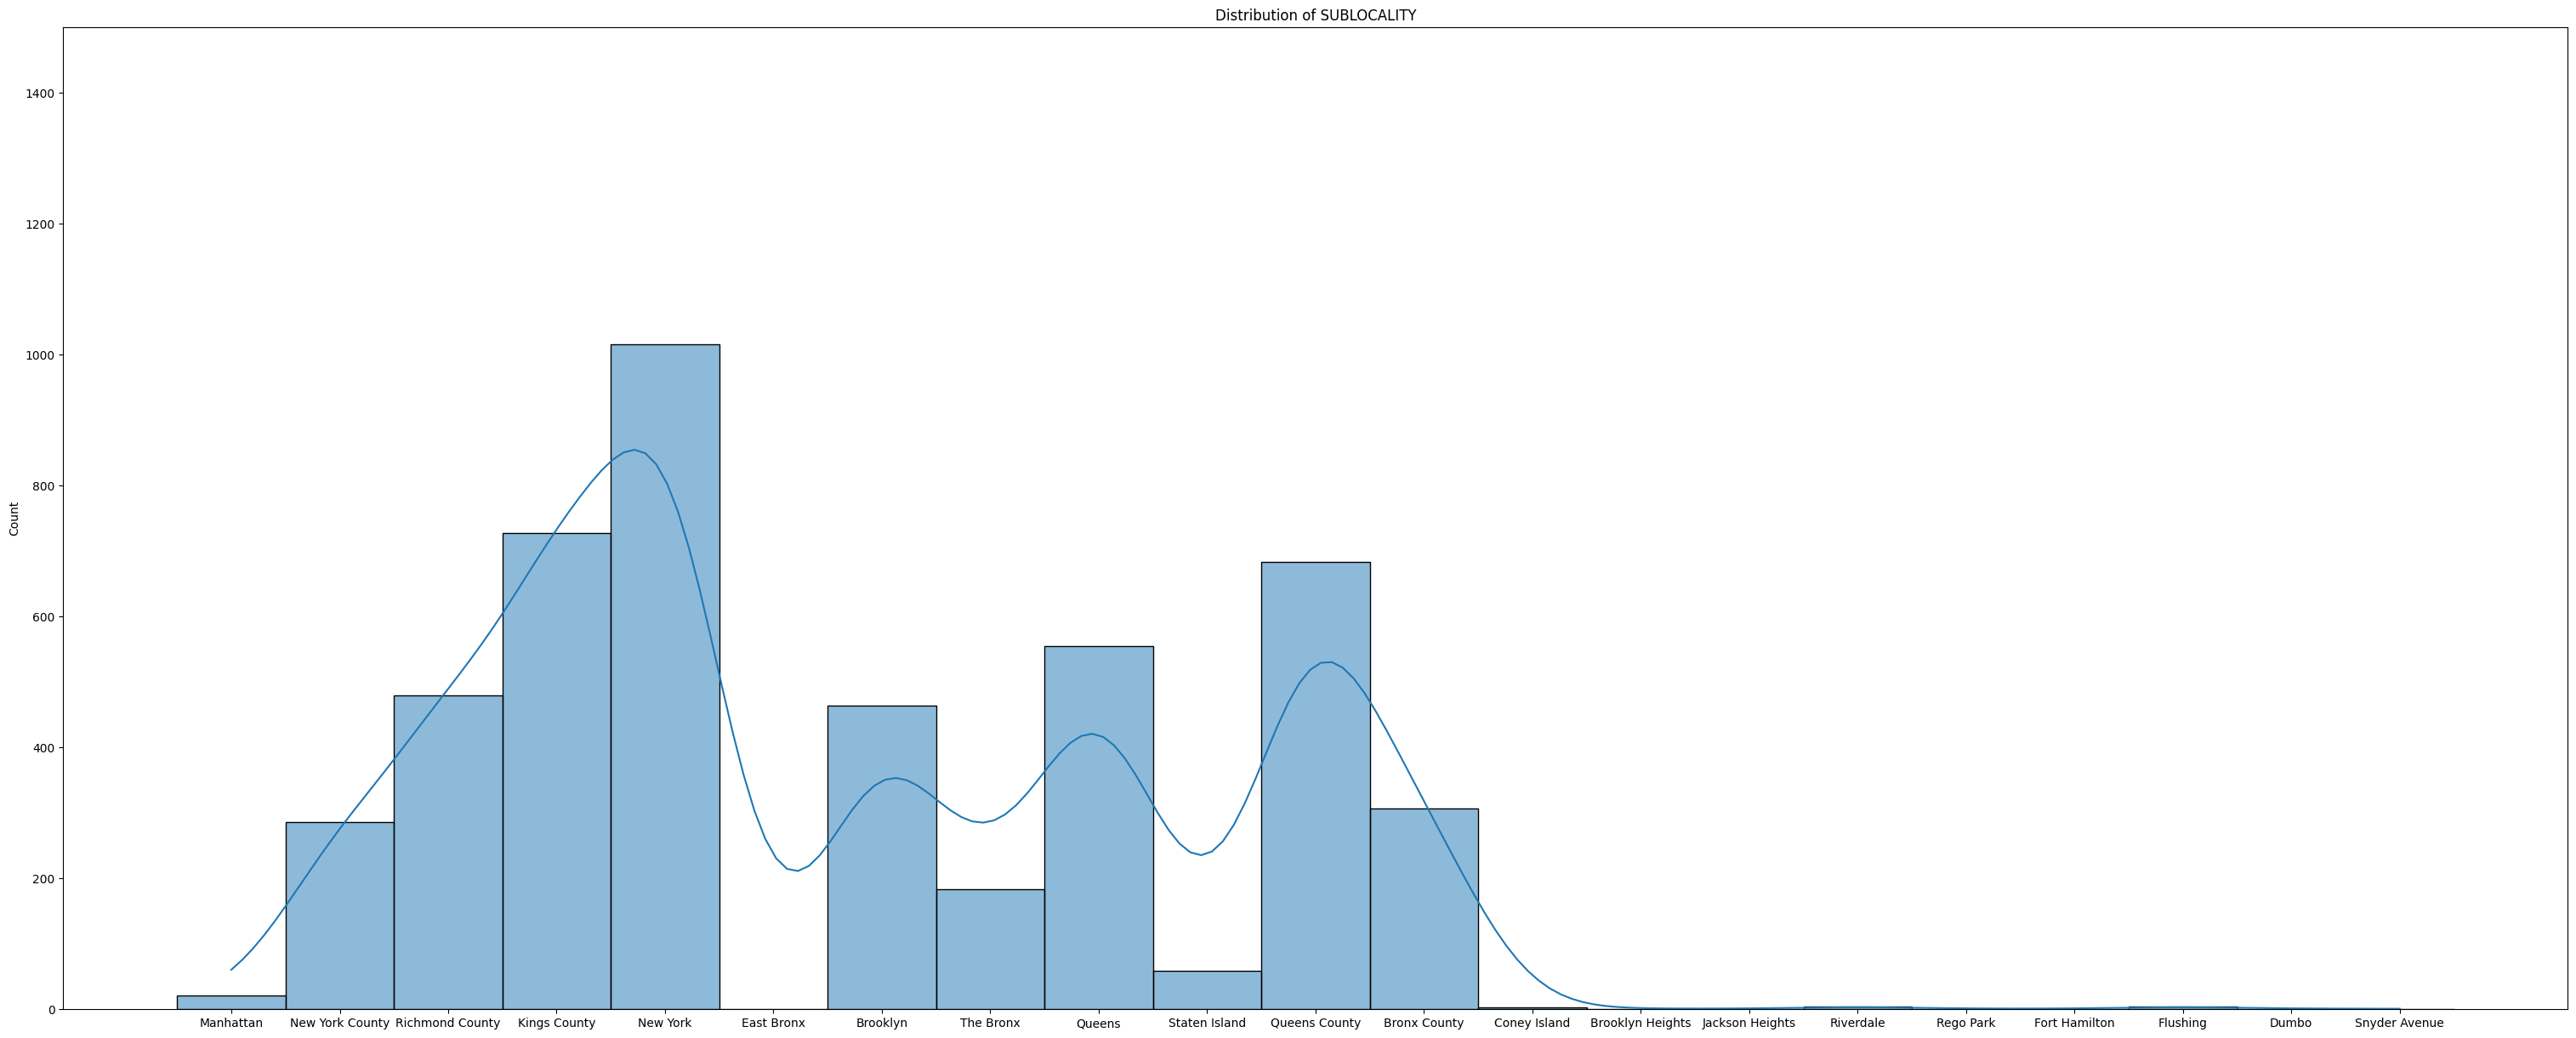

In [ ]:
fig, ax = plt.subplots(figsize=(38, 15))
fig = sns.histplot(data=housing, x='SUBLOCALITY', bins=75, kde=True)
plt.ylim(0,1500)
fig.set(xlabel='')
plt.title('Distribution of SUBLOCALITY')
plt.show()

In [ ]:
housing.info()
#Too many categorical columns. Need to remove them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
from scipy import stats
import numpy as np

#https://www.kaggle.com/code/bbjadeja/new-york-houseprediction

# Calculate z-scores for the 'BED' column
z_scores = stats.zscore(housing['BEDS'])

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify outliers based on the threshold
outliers_beds = housing['BEDS'][np.abs(z_scores) > threshold]

# Display the outliers
print("Outliers in the BED column:")
print(outliers_beds)

Outliers in the BED column:
27      12
133     12
222     12
232     15
374     12
465     12
469     15
532     12
550     14
733     16
750     20
765     35
936     16
1092    24
1106    12
1143    50
1214    20
1410    20
1464    12
1467    12
1491    12
1672    12
1741    12
1821    13
1840    12
1945    16
1999    14
2265    32
2345    12
2392    13
2488    36
2564    24
2653    42
2852    12
3276    40
3303    12
3363    13
3568    15
3589    32
3603    30
3802    12
3936    12
3986    12
4023    16
4129    14
4139    14
4157    13
4190    12
4191    19
4195    13
4240    24
4251    15
4261    14
4282    14
4287    12
4404    18
4523    14
4689    12
4786    12
4795    15
Name: BEDS, dtype: int64


In [ ]:
from scipy import stats
import numpy as np

# Calculate z-scores for the 'PRICE' column
z_scores = stats.zscore(housing['BATH'])

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify outliers based on the threshold
outliers_bath = housing['BATH'][np.abs(z_scores) > threshold]

# Display the outliers
print("Outliers in the BATH column:")
print(outliers_bath)

Outliers in the BATH column:
1       10.0
7       16.0
139      9.0
141     10.0
222     10.0
232      9.0
270     10.0
601      9.0
622     32.0
631     13.0
750     10.0
765     16.0
936     16.0
1072    10.0
1136    10.0
1143    50.0
1214    20.0
1395    10.0
1430    10.0
1815    10.0
1825    11.0
1835    10.0
2076    11.0
2107    10.0
2141    10.0
2265    12.0
2488    16.0
2564    24.0
2653    43.0
3276    20.0
3316     9.0
3589    12.0
3603    20.0
4240    16.0
4251    10.0
4282     9.0
4404    12.0
4501    10.0
4651     9.0
4691    17.0
4745    10.0
4795     9.0
Name: BATH, dtype: float64


## Data Preparation

In [ ]:
housing = housing.drop("BROKERTITLE", axis = 1)
housing = housing.drop("ADDRESS", axis = 1)
housing = housing.drop("STATE", axis = 1)
housing = housing.drop("MAIN_ADDRESS", axis = 1)
housing = housing.drop("FORMATTED_ADDRESS", axis = 1)
housing = housing.drop("ADMINISTRATIVE_AREA_LEVEL_2", axis = 1)
housing = housing.drop("LOCALITY", axis = 1)
housing = housing.drop("STREET_NAME", axis = 1)
housing = housing.drop("LONG_NAME", axis = 1)

In [ ]:
#housing = housing.drop("LATITUDE", axis = 1)
#housing = housing.drop("LONGITUDE", axis = 1)

In [ ]:
#housing.drop(columns=['BATH'], housing = 10)
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

#indexBath = housing[(housing['BATH'] >= 8)].index
#housing.drop(indexBath , inplace=True)

In [ ]:
indexBed = housing[(housing['BEDS'] >= 12)].index
housing.drop(indexBed , inplace=True)

In [ ]:
indexBed = housing[(housing['BATH'] >= 7)].index
housing.drop(indexBed , inplace=True)

In [ ]:
indexPrice = housing[(housing['PRICE'] <= 49500) ].index
housing.drop(indexPrice , inplace=True)

In [ ]:
indexPrice = housing[(housing['PRICE'] >= 39995000)].index
housing.drop(indexPrice , inplace=True)

In [ ]:
indexComingSoon = housing.loc[(housing['TYPE'] == 'Coming Soon')].index
housing.drop(indexComingSoon, inplace=True)

In [ ]:
housing = housing.dropna()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4653 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4653 non-null   object 
 1   PRICE         4653 non-null   int64  
 2   BEDS          4653 non-null   int64  
 3   BATH          4653 non-null   float64
 4   PROPERTYSQFT  4653 non-null   float64
 5   SUBLOCALITY   4653 non-null   object 
 6   LATITUDE      4653 non-null   float64
 7   LONGITUDE     4653 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 327.2+ KB


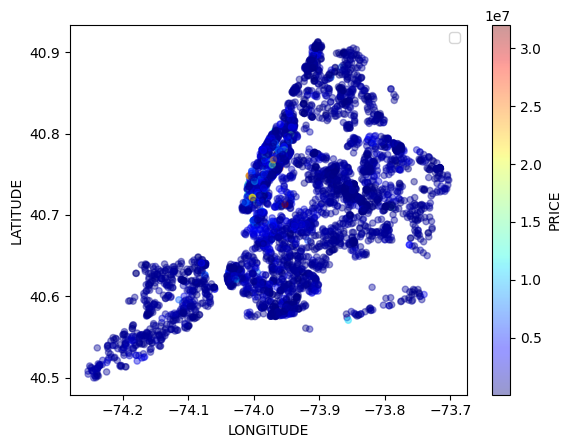

In [ ]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True)
#s is showing off population

plt.legend()

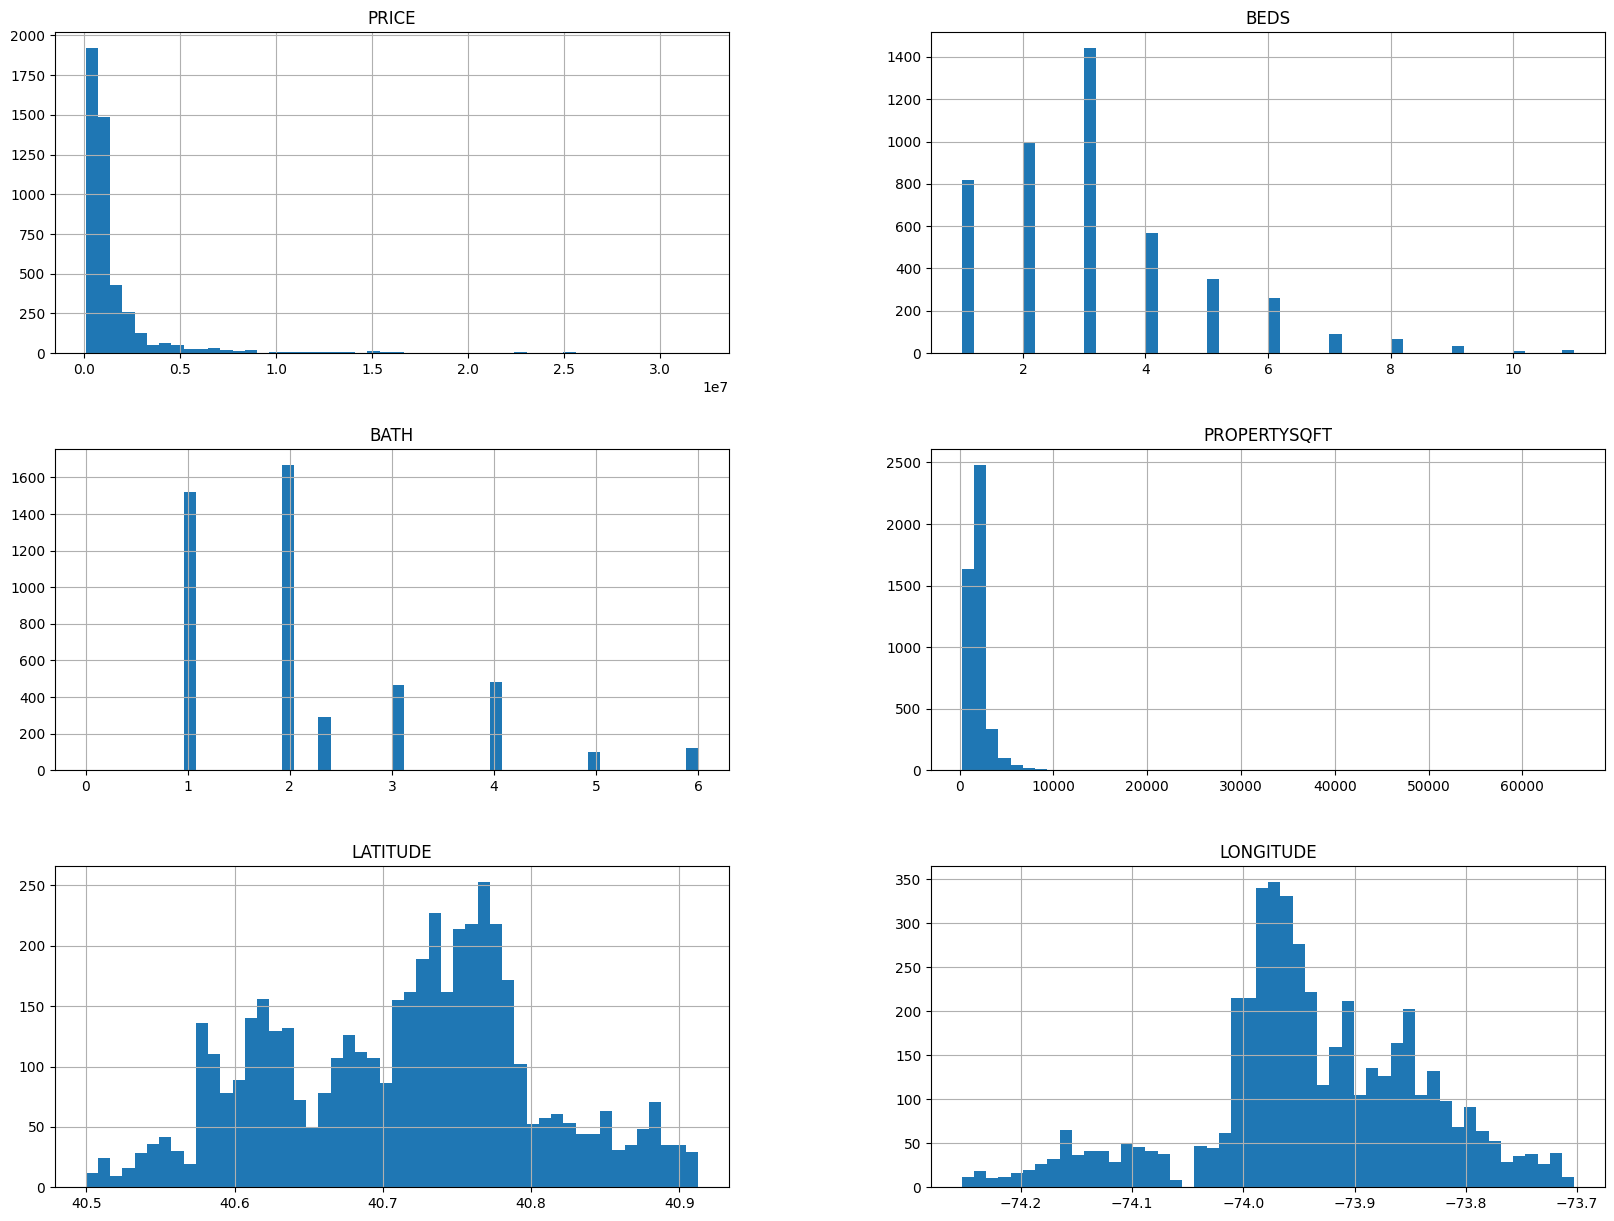

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Data Clean

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [ ]:
housing_train = train_set.drop('PRICE', axis=1)
housing_train_labels = train_set['PRICE'].copy()

housing_test = test_set.drop('PRICE', axis=1)
housing_test_labels = test_set['PRICE'].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


num_attribs = ["BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]
cat_attribs = ["TYPE", "SUBLOCALITY"]

num_pipeline = Pipeline([
    ("standardize", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("oneHot", OneHotEncoder()),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
train_prepared = preprocessing.fit_transform(housing_train)
test_prepared = preprocessing.transform(housing_test)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_clf_maxDepth2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_clf_maxDepth2.fit(train_prepared, housing_train_labels)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
print("features:", tree_clf_maxDepth2.n_features_in_)

features: 38


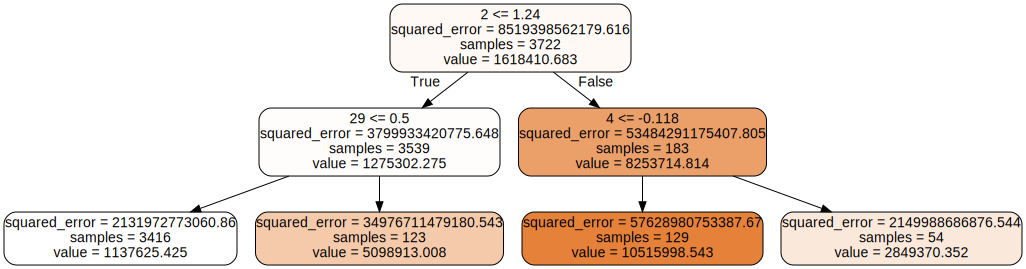

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

feature_names = [str(i) for i in range(38)]

export_graphviz(
    tree_clf_maxDepth2,
    out_file="regression_tree.dot",
    feature_names=feature_names,
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

## DecisionTree

In [ ]:
from sklearn.metrics import mean_squared_error

tree_clf_maxDepth1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_clf_maxDepth1.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxDepth1 = tree_clf_maxDepth1.predict(train_prepared)
housing_test_predictions_maxDepth1 = tree_clf_maxDepth1.predict(test_prepared)



housing_train_rmse_maxDepth1 = mean_squared_error(housing_train_labels, housing_train_predictions_maxDepth1,
                              squared=False)

housing_test_rmse_maxDepth1 = mean_squared_error(housing_test_labels, housing_test_predictions_maxDepth1,
                              squared=False)

print("Housing Train RSME (maxdepth = 1): ",  round(housing_train_rmse_maxDepth1,2))
print("Housing Test RSME (maxdepth = 1):  ", round(housing_test_rmse_maxDepth1,2))
print("Error Difference Train & Test:     ", round(housing_train_rmse_maxDepth1 - housing_test_rmse_maxDepth1,2))

Housing Train RSME (maxdepth = 1):  2498553.57
Housing Test RSME (maxdepth = 1):   2496855.33
Error Difference Train & Test:      1698.24


In [ ]:
from sklearn.metrics import mean_squared_error

tree_clf_maxDepth2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_clf_maxDepth2.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxDepth2 = tree_clf_maxDepth2.predict(train_prepared)
housing_test_predictions_maxDepth2 = tree_clf_maxDepth2.predict(test_prepared)



housing_train_rmse_maxDepth2 = mean_squared_error(housing_train_labels, housing_train_predictions_maxDepth2,
                              squared=False)

housing_test_rmse_maxDepth2 = mean_squared_error(housing_test_labels, housing_test_predictions_maxDepth2,
                              squared=False)

print("Housing Train RSME (maxdepth = 2): ", round(housing_train_rmse_maxDepth2,2))
print("Housing Test RSME ( maxdepth = 2): ", round(housing_test_rmse_maxDepth2,2))
print("Error Difference Train & Test:     ", round(housing_test_rmse_maxDepth2 - housing_train_rmse_maxDepth2,2))

Housing Train RSME (maxdepth = 2):  2267400.47
Housing Test RSME ( maxdepth = 2):  2305372.67
Error Difference Train & Test:      37972.2


In [ ]:
from sklearn.metrics import mean_squared_error

tree_clf_maxDepth8 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_clf_maxDepth8.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxDepth8 = tree_clf_maxDepth8.predict(train_prepared)
housing_test_predictions_maxDepth8 = tree_clf_maxDepth8.predict(test_prepared)



housing_train_rmse_maxDepth8 = mean_squared_error(housing_train_labels, housing_train_predictions_maxDepth8,
                              squared=False)

housing_test_rmse_maxDepth8 = mean_squared_error(housing_test_labels, housing_test_predictions_maxDepth8,
                              squared=False)

print("Housing Train RSME (maxdepth = 8): ", round(housing_train_rmse_maxDepth8,2))
print("Housing Test RSME (maxdepth = 8):  ", round(housing_test_rmse_maxDepth8,2))
print("Error Difference Train & Test:     ", round(housing_test_rmse_maxDepth8 - housing_train_rmse_maxDepth8,2))

Housing Train RSME (maxdepth = 8):  1554204.55
Housing Test RSME (maxdepth = 8):   1706202.68
Error Difference Train & Test:      151998.12


In [ ]:
from sklearn.metrics import mean_squared_error

tree_clf_maxDepth10 = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_clf_maxDepth10.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxDepth10 = tree_clf_maxDepth10.predict(train_prepared)
housing_test_predictions_maxDepth10 = tree_clf_maxDepth10.predict(test_prepared)



housing_train_rmse_maxDepth10 = mean_squared_error(housing_train_labels, housing_train_predictions_maxDepth10,
                              squared=False)

housing_test_rmse_maxDepth10 = mean_squared_error(housing_test_labels, housing_test_predictions_maxDepth10,
                              squared=False)

print("Housing Train RSME (maxdepth = 10): ", round(housing_train_rmse_maxDepth10,2))
print("Housing Test RSME (maxdepth = 10):  ", round(housing_test_rmse_maxDepth10,2))
print("Error Difference Train & Test:      ", round(housing_test_rmse_maxDepth10 - housing_train_rmse_maxDepth10,2))

Housing Train RSME (maxdepth = 10):  668823.13
Housing Test RSME (maxdepth = 10):   1715704.7
Error Difference Train & Test:       1046881.56


In [ ]:
from sklearn.metrics import mean_squared_error

tree_clf_maxDepth20 = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_clf_maxDepth20.fit(train_prepared, housing_train_labels)


housing_train_predictions = tree_clf_maxDepth20.predict(train_prepared)
housing_test_predictions = tree_clf_maxDepth20.predict(test_prepared)



housing_train_rmse_maxDepth20 = mean_squared_error(housing_train_labels, housing_train_predictions,
                              squared=False)

housing_test_rmse_maxDepth20 = mean_squared_error(housing_test_labels, housing_test_predictions,
                              squared=False)

print("Housing Train RSME (maxdepth = 20): ", round(housing_train_rmse_maxDepth20,2))
print("Housing Test RSME ( maxdepth = 20): ", round(housing_test_rmse_maxDepth20,2))
print("Error Difference Train & Test:      ", round(housing_test_rmse_maxDepth10 - housing_train_rmse_maxDepth10,2))

Housing Train RSME (maxdepth = 20):  83480.21
Housing Test RSME ( maxdepth = 20):  1810629.57
Error Difference Train & Test:       1046881.56


In [ ]:
tree_clf_maxDepth30 = DecisionTreeRegressor(max_depth=30, random_state=42)

tree_clf_maxDepth30.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxdepth30 = tree_clf_maxDepth30.predict(train_prepared)
housing_test_predictions_maxdepth30 = tree_clf_maxDepth30.predict(test_prepared)


housing_train_rmse_maxdepth30 = mean_squared_error(housing_train_labels, housing_train_predictions_maxdepth30,
                              squared=False)
housing_test_rmse_maxdepth30 = mean_squared_error(housing_test_labels, housing_test_predictions_maxdepth30,
                              squared=False)

print("Housing Train RSME (maxdepth = 30): ", round(housing_train_rmse_maxdepth30,2))
print("Housing Test RSME ( maxdepth = 30): ", round(housing_test_rmse_maxdepth30,2))
print("Error Difference Train & Test:      ", round(housing_test_rmse_maxdepth30 - housing_train_rmse_maxdepth30,2))

Housing Train RSME (maxdepth = 30):  52312.96
Housing Test RSME ( maxdepth = 30):  1733479.17
Error Difference Train & Test:       1681166.21


In [ ]:
tree_clf_maxDepth50 = DecisionTreeRegressor(max_depth=50, random_state=42)

tree_clf_maxDepth50.fit(train_prepared, housing_train_labels)

housing_train_predictions_maxdepth50 = tree_clf_maxDepth50.predict(train_prepared)
housing_test_predictions_maxdepth50 = tree_clf_maxDepth50.predict(test_prepared)


housing_train_rmse_maxdepth50 = mean_squared_error(housing_train_labels, housing_train_predictions_maxdepth30,
                              squared=False)
housing_test_rmse_maxdepth50 = mean_squared_error(housing_test_labels, housing_test_predictions_maxdepth30,
                              squared=False)

print("Housing Train RSME (maxdepth = 50): ", round(housing_train_rmse_maxdepth50,2))
print("Housing Test RSME ( maxdepth = 50): ", round(housing_test_rmse_maxdepth50,2))
print("Error Difference Train & Test:      ", round(housing_test_rmse_maxdepth50 - housing_train_rmse_maxdepth50,2))

Housing Train RSME (maxdepth = 50):  52312.96
Housing Test RSME ( maxdepth = 50):  1733479.17
Error Difference Train & Test:       1681166.21


## Random Rorest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rnd_reg_estimator250 = RandomForestRegressor(n_estimators=250, random_state=120)
rnd_reg_estimator250.fit(train_prepared, housing_train_labels)

train_predictions_estimator250 = rnd_reg_estimator250.predict(train_prepared)
tree_train_rmse_estimator250 = mean_squared_error(housing_train_labels, train_predictions_estimator250,
                              squared=False)

test_predictions_estimator250 = rnd_reg_estimator250.predict(test_prepared)
tree_test_rmse_estimator250 = mean_squared_error(housing_test_labels, test_predictions_estimator250 ,
                              squared=False)

print('random forest train RMSE: ', round(tree_train_rmse_estimator250,2))
print('random forest test RMSE:  ', round(tree_test_rmse_estimator250,2))
print('Difference Train & Test:  ', round(tree_test_rmse_estimator250 - tree_train_rmse_estimator250,2))

random forest train RMSE:  588286.8
random forest test RMSE:   1483947.43
Difference Train & Test:   895660.63


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rnd_reg_randomstate50 = RandomForestRegressor(n_estimators=500, random_state=50)
rnd_reg_randomstate50.fit(train_prepared, housing_train_labels)

train_predictions = rnd_reg_randomstate50.predict(train_prepared)
tree_train_rmse = mean_squared_error(housing_train_labels, train_predictions,
                              squared=False)

test_predictions = rnd_reg_randomstate50.predict(test_prepared)
tree_test_rmse = mean_squared_error(housing_test_labels, test_predictions,
                              squared=False)

print('random forest train RMSE: ', round(tree_train_rmse,2))
print('random forest test RMSE:  ', round(tree_test_rmse,2))
print('Difference RF (Est=500):  ', round(tree_test_rmse - tree_train_rmse,2))

random forest train RMSE:  575135.04
random forest test RMSE:   1474431.37
Difference RF (Est=500):   899296.33


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rnd_reg_estimator750 = RandomForestRegressor(n_estimators=750, random_state=50)
rnd_reg_estimator750.fit(train_prepared, housing_train_labels)

train_predictions_estimator750 = rnd_reg_estimator750.predict(train_prepared)
tree_train_rmse_estimator750 = mean_squared_error(housing_train_labels, train_predictions_estimator750,
                              squared=False)

test_predictions_estimator750 = rnd_reg_estimator750.predict(test_prepared)
tree_test_rmse_estimator750 = mean_squared_error(housing_test_labels, test_predictions_estimator750,
                              squared=False)

print('random forest train RMSE: ', round(tree_train_rmse_estimator750,2))
print('random forest test RMSE:  ', round(tree_test_rmse_estimator750,2))
print('Difference (Est=750):  ', round(tree_test_rmse_estimator750 - tree_train_rmse_estimator750,2))

random forest train RMSE:  574734.29
random forest test RMSE:   1465578.45
Difference (Est=750):   890844.16


## Linear & Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lin_reg = LinearRegression()
lin_reg.fit(train_prepared, housing_train_labels)

housing_linear_train_predictions = lin_reg.predict(train_prepared)
housing_train_rmse = mean_squared_error(housing_train_labels, housing_linear_train_predictions,
                              squared=False)
housing_linear_test_predictions = lin_reg.predict(test_prepared)
housing_test_rmse = mean_squared_error(housing_test_labels, housing_linear_test_predictions,
                              squared=False)

print("Linear Train RSME: ", round(housing_train_rmse, 2))
print("Linear Test RSME:  ",  round(housing_test_rmse, 2))
print("Difference:        ", round(housing_test_rmse - housing_train_rmse, 2))

Linear Train RSME:  2109663.55
Linear Test RSME:   2116451.84
Difference:         6788.28


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net_linear = ElasticNet(alpha=0.6, l1_ratio=0.8)
elastic_net_linear.fit(train_prepared, housing_train_labels)

train_predictions_linear = elastic_net_linear.predict(train_prepared)
train_rmse_linear = mean_squared_error(housing_train_labels, train_predictions_linear,
                              squared=False)


test_predictions = elastic_net_linear.predict(test_prepared)
test_rmse_linear = mean_squared_error(housing_test_labels, test_predictions,
                              squared=False)

print('Linear Train RMSE (address overfitting)', round(train_rmse_linear,2))
print('Linear Test RMSE (address overfitting) ',  round(test_rmse_linear,2))
print('Error Difference Train & Test:         ',  round(test_rmse_linear - train_rmse_linear,2))

Linear Train RMSE (address overfitting) 2232811.03
Linear Test RMSE (address overfitting)  2294882.85
Error Difference Train & Test:          62071.81


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly_features_2nd = PolynomialFeatures(degree=2, include_bias=False)
train_prepared_2nd = poly_features_2nd.fit_transform(train_prepared)
test_prepared_2nd = poly_features_2nd.transform(test_prepared)

poly_2nd = LinearRegression()
poly_2nd.fit(train_prepared_2nd, housing_train_labels)

train_predictions_2nd = poly_2nd.predict(train_prepared_2nd)
train_rmse_2nd = mean_squared_error(housing_train_labels, train_predictions_2nd,
                              squared=False)

test_predictions_2nd = poly_2nd.predict(test_prepared_2nd)
test_rmse_2nd = mean_squared_error(housing_test_labels, test_predictions_2nd,
                              squared=False)

print('2nd Poly Train RMSE: ', round(train_rmse_2nd,2))
print('2nd Poly Test RMSE : ', round(test_rmse_2nd,2))
print('Difference 2nd Poly:   ', round(test_rmse_2nd - train_rmse_2nd,2))

2nd Poly Train RMSE:  1666704.6
2nd Poly Test RMSE :  1747734.95
Difference 2nd Poly:    81030.35


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net_2nd = ElasticNet(alpha=10, l1_ratio=0.8)
elastic_net_2nd.fit(train_prepared_2nd, housing_train_labels)

train_predictions_2nd = elastic_net_2nd.predict(train_prepared_2nd)
train_rmse_2nd = mean_squared_error(housing_train_labels, train_predictions_2nd,
                              squared=False)


test_predictions_2nd = elastic_net_2nd.predict(test_prepared_2nd)
test_rmse_2rd = mean_squared_error(housing_test_labels, test_predictions_2nd,
                              squared=False)

print('2rd train RMSE (address overfitting)', round(train_rmse_2nd,2))
print('2nd test RMSE (address overfitting) ', round(test_rmse_2nd,2))
print('Error Difference Train & Test:      ', round(train_rmse_2nd - test_rmse_2nd,2))

2rd train RMSE (address overfitting) 2258860.28
2nd test RMSE (address overfitting)  1747734.95
Error Difference Train & Test:       511125.33


In [ ]:
poly_features_3rd = PolynomialFeatures(degree=3, include_bias=False)
train_prepared_3rd = poly_features_3rd.fit_transform(train_prepared)
test_prepared_3rd = poly_features_3rd.transform(test_prepared)

poly_3rd = LinearRegression()
poly_3rd.fit(train_prepared_3rd, housing_train_labels)

train_predictions_3rd = poly_3rd.predict(train_prepared_3rd)
train_rmse_3rd = mean_squared_error(housing_train_labels, train_predictions_3rd,
                              squared=False)


test_predictions_3rd = poly_3rd.predict(test_prepared_3rd)
test_rmse_3rd = mean_squared_error(housing_test_labels, test_predictions_3rd,
                              squared=False)

print('3rd Poly train RMSE: ', round(train_rmse_3rd,2))
print('3rd Poly test RMSE :  ', round(test_rmse_3rd,2))
print('Difference 3rd     : ', round(test_rmse_3rd - train_rmse_3rd,2))

3rd Poly train RMSE:  1263285.65
3rd Poly test RMSE:   27228005.62
Difference 3rd    :  25964719.97


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net_3rd = ElasticNet(alpha=0.8, l1_ratio=1)
elastic_net_3rd.fit(train_prepared_3rd, housing_train_labels)

train_predictions_3rd = elastic_net_3rd.predict(train_prepared_3rd)
train_rmse_3rd = mean_squared_error(housing_train_labels, train_predictions_3rd,
                              squared=False)


test_predictions_3rd = elastic_net_3rd.predict(test_prepared_3rd)
test_rmse_3rd = mean_squared_error(housing_test_labels, test_predictions_3rd,
                              squared=False)

print('3rd train RMSE (address overfitting): ', round(train_rmse_3rd,2))
print('3rd test RMSE (address overfitting):  ', round(test_rmse_3rd,2))
print('Error Difference 3rd Train & Test:    ', round(test_rmse_3rd - train_rmse_3rd,2))

3rd train RMSE (address overfitting):  1259213.08
3rd test RMSE (address overfitting):   23362074.61
Error Difference 3rd Train & Test:     22102861.53


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2954906666105103.5, tolerance: 3170920144843.2676
  model = cd_fast.sparse_enet_coordinate_descent(


### Support Vector Machines:

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

svm_lin = LinearSVR(epsilon=0.8, random_state=42)
svm_lin.fit(train_prepared, housing_train_labels)

train_predictions = svm_lin.predict(train_prepared)
svm_train_rmse = mean_squared_error(housing_train_labels, train_predictions,
                              squared=False)

test_predictions = svm_lin.predict(test_prepared)
svm_test_rmse = mean_squared_error(housing_test_labels, test_predictions,
                              squared=False)

print('linear SVM train RMSE: ', round(svm_train_rmse,2))
print('linear SVM test RMSE:  ', round(svm_test_rmse,2))
print('Difference SVM Linear: ', round(svm_test_rmse - svm_train_rmse,2))

linear SVM train RMSE:  3335102.26
linear SVM test RMSE:   3443107.65
Difference SVM Linear:  108005.39


In [ ]:
#polynomial 2nd
from sklearn.svm import SVR

svm_poly_2nd = SVR(kernel="poly", degree=2, C=100, epsilon=0.5)
svm_poly_2nd.fit(train_prepared, housing_train_labels)

train_predictions_2nd = svm_poly_2nd.predict(train_prepared)
svm_train_rmse_2nd = mean_squared_error(housing_train_labels, train_predictions_2nd,
                              squared=False)

test_predictions_2nd = svm_poly_2nd.predict(test_prepared)
svm_test_rmse_2nd = mean_squared_error(housing_test_labels, test_predictions_2nd,
                              squared=False)

print('2nd degree SVM train RMSE: ', round(svm_train_rmse_2nd,2))
print('2nd degree SVM test RMSE:  ', round(svm_test_rmse_2nd,2))
print('Difference SVM 2nd:        ', round(svm_test_rmse_2nd - svm_train_rmse_2nd,2))

2nd degree SVM train RMSE:  3013426.9
2nd degree SVM test RMSE:   3050956.19
Difference SVM 2nd:         37529.29


In [ ]:
#polynomial 3rd
from sklearn.svm import SVR

svm_poly = SVR(kernel="poly", degree=3, C=15, epsilon=0.8)
svm_poly.fit(train_prepared, housing_train_labels)

train_predictions_3rd  = svm_poly.predict(train_prepared)
svm_train_rmse_3rd = mean_squared_error(housing_train_labels, train_predictions_3rd ,
                              squared=False)


test_predictions_3rd  = svm_poly.predict(test_prepared)
svm_test_rmse_3rd  = mean_squared_error(housing_test_labels, test_predictions_3rd ,
                              squared=False)

print('3rd degree SVM train RMSE: ', round(svm_train_rmse_3rd,2))
print('3rd degree SVM test RMSE:  ', round(svm_test_rmse_3rd,2))
print('Difference SVM 3rd:        ', round(svm_test_rmse_3rd  - svm_train_rmse_3rd,2))

3rd degree SVM train RMSE:  3022555.72
3rd degree SVM test RMSE:   3048817.47
Difference SVM 3rd:         26261.75
